# 1. Introduction

The task involves evaluating the performance of a binary classification model using a dataset that contains actual classifications, predicted classifications, and the model's probability scores for each observation. The goal is to both calculate various performance metrics manually through custom Python functions and compare these calculations with results obtained from pre-built functions in the scikit-learn library. Additionally, graphical outputs such as ROC curves will be generated to visually assess model performance.

Here's a summary of the steps to address this problem:

1. **Data Preparation**: Load the dataset from the GitHub repository into a Pandas DataFrame. This step involves reading the CSV file and ensuring the data is correctly imported for analysis.

2. **Confusion Matrix Calculation**: Use Pandas’ crosstab() function to calculate a confusion matrix. This involves understanding and correctly interpreting the output, ensuring we know which dimensions represent actual versus predicted classifications.

3. **Extraction of Confusion Matrix Values**: Extract the individual values from the confusion matrix (True Positives, False Positives, True Negatives, False Negatives) and save them for later use. These values are critical for calculating various performance metrics.

4. **Custom Metric Calculation Functions**:
* Develop Python functions that calculate the following metrics without using pre-built Python functions:
    * Accuracy
    * Precision
    * Sensitivity (Recall)
    * Specificity
    * F1 Score

5. **ROC Curve and AUC Calculation Function**: Create a Python function to plot a Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for the dataset.

6. **Application of Custom Functions**: Apply the custom functions developed in steps 4 and 5 to the dataset to calculate and visualize the performance metrics.

7. **Comparison with Pre-built Functions**: Use scikit-learn's pre-built functions (such as confusion_matrix(), accuracy_score(), precision_score(), recall_score(), f1_score(), classification_report(), plot_roc_curve(), and auc()) to calculate the same metrics and compare these results with those obtained from the custom functions.

8. **Analysis and Discussion**: Discuss how the results from the custom functions compare with those from the pre-built functions. This will involve analyzing any discrepancies and assessing the accuracy and effectiveness of the custom implementations.

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

# 2. Data Preparation

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/M5%20Classification%20Model%20Performance%20Metrics/M5_Data.csv")
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [3]:
df.info

<bound method DataFrame.info of      pregnant  glucose  diastolic  skinfold  insulin   bmi  pedigree  age  \
0           7      124         70        33      215  25.5     0.161   37   
1           2      122         76        27      200  35.9     0.483   26   
2           3      107         62        13       48  22.9     0.678   23   
3           1       91         64        24        0  29.2     0.192   21   
4           4       83         86        19        0  29.3     0.317   34   
..        ...      ...        ...       ...      ...   ...       ...  ...   
176         5      123         74        40       77  34.1     0.269   28   
177         4      146         78         0        0  38.5     0.520   67   
178         8      188         78         0        0  47.9     0.137   43   
179         9      120         72        22       56  20.8     0.733   48   
180         0      102         86        17      105  29.3     0.695   27   

     class  scored.class  scored.probabilit

In [4]:
# Summary statistics for all numerical attributes
df.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

# 3. Confusion Matrix Calculation

In [6]:
# Calculate the confusion matrix
confusion_matrix = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
print(confusion_matrix)

# Verify the matrix with value_counts for actual and predicted classifications
print("\nActual classification counts:\n", df['class'].value_counts())
print("\nPredicted classification counts:\n", df['scored.class'].value_counts())

Predicted    0   1
Actual            
0          119   5
1           30  27

Actual classification counts:
 0    124
1     57
Name: class, dtype: int64

Predicted classification counts:
 0    149
1     32
Name: scored.class, dtype: int64


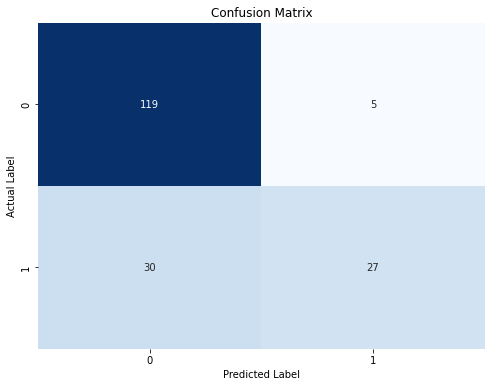

In [7]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

From the confusion matrix, we can observe:
* Rows represent the actual classifications, with '0' and '1' indicating the true negative and true positive instances, respectively.
* Columns represent the predicted classifications, with '0' and '1' indicating the model's negative and positive predictions, respectively.

The value_counts() for the class (actual classification) and scored.class (predicted classification) columns are:
* Actual classification counts: 0 (124 instances), 1 (57 instances)
* Predicted classification counts: 0 (149 instances), 1 (32 instances)

# 4. Extraction of Confusion Matrix Values

In [8]:
# Extracting individual values from the confusion matrix
true_negative = confusion_matrix.at[0, 0]
false_positive = confusion_matrix.at[0, 1]
false_negative = confusion_matrix.at[1, 0]
true_positive = confusion_matrix.at[1, 1]

# Saving each to individual variables
TN = true_negative
FP = false_positive
FN = false_negative
TP = true_positive

(TN, FP, FN, TP)

(119, 5, 30, 27)

These counts align with the sums of the respective rows and columns in the confusion matrix, confirming our understanding of the matrix's structure. The matrix shows:
* True Negatives (TN): 119 (Actual 0, Predicted 0)
* False Positives (FP): 5 (Actual 0, Predicted 1)
* False Negatives (FN): 30 (Actual 1, Predicted 0)
* True Positives (TP): 27 (Actual 1, Predicted 1)

This analysis helps us understand how well the model performs in terms of correctly and incorrectly classifying the observations.

# 5. Custom Metric Calculation Functions

## 1. Accuracy

In [9]:
def calculate_accuracy(actual, predicted):
    """
    Calculate the accuracy of binary classification predictions.

    Parameters:
    - actual: array-like, true labels of the data
    - predicted: array-like, predicted labels of the data

    Returns:
    - accuracy: float, the accuracy of the predictions
    """
    # Convert inputs to pandas series to ensure compatibility with indexing and operations
    actual = pd.Series(actual)
    predicted = pd.Series(predicted)
    
    # Calculate the number of correct predictions
    correct_predictions = (actual == predicted).sum()
    
    # Calculate the total number of predictions
    total_predictions = len(actual)
    
    # Calculate accuracy
    accuracy = correct_predictions / total_predictions
    
    return accuracy

# Calculate accuracy using the actual and predicted classifications from our dataset
accuracy_our_data = calculate_accuracy(df['class'], df['scored.class'])
accuracy_our_data

0.8066298342541437

The accuracy of the binary classification predictions for our dataset, calculated using the custom function, is approximately 0.807. This means that about 80.7% of the predictions made by the classification model are correct.

## 2. Precision 

In [10]:
def calculate_precision(TP, FP):
    """
    Calculate the precision of binary classification predictions.

    Parameters:
    - TP: int, true positives
    - FP: int, false positives

    Returns:
    - precision: float, the precision of the predictions
    """
    # Calculate precision
    if TP + FP == 0:  # To avoid division by zero
        return 0
    precision = TP / (TP + FP)
    
    return precision

# Calculate precision using the True Positive and False Positive values from our data
precision_our_data = calculate_precision(TP, FP)
precision_our_data

0.84375


The precision of the binary classification predictions for our dataset, calculated using the custom function, is approximately 0.844. This indicates that about 84.4% of the positive predictions made by the classification model are correct. 

## 3. Sensitivity

In [11]:
def calculate_sensitivity(TP, FN):
    """
    Calculate the sensitivity (recall) of binary classification predictions.

    Parameters:
    - TP: int, true positives
    - FN: int, false negatives

    Returns:
    - sensitivity: float, the sensitivity of the predictions
    """
    # Calculate sensitivity
    if TP + FN == 0:  # To avoid division by zero
        return 0
    sensitivity = TP / (TP + FN)
    
    return sensitivity

# Calculate sensitivity using the True Positive and False Negative values from our data
sensitivity_our_data = calculate_sensitivity(TP, FN)
sensitivity_our_data

0.47368421052631576

The sensitivity (also known as recall) of the binary classification predictions for our dataset, calculated using the custom function, is approximately 0.474. This means that the classification model correctly identifies about 47.4% of the actual positive instances. 

## 4. Specificity

In [12]:
def calculate_specificity(TN, FP):
    """
    Calculate the specificity of binary classification predictions.

    Parameters:
    - TN: int, true negatives
    - FP: int, false positives

    Returns:
    - specificity: float, the specificity of the predictions
    """
    # Calculate specificity
    if TN + FP == 0:  # To avoid division by zero
        return 0
    specificity = TN / (TN + FP)
    
    return specificity

# Calculate specificity using the True Negative and False Positive values from our data
specificity_our_data = calculate_specificity(TN, FP)
specificity_our_data

0.9596774193548387

The specificity of the binary classification predictions for our dataset, calculated using the custom function, is approximately 0.960. This indicates that the classification model correctly identifies about 96.0% of the actual negative instances.

## 5. F1 Score

In [13]:
def calculate_f1_score(TP, FP, FN):
    """
    Calculate the F1 Score of binary classification predictions.

    Parameters:
    - TP: int, true positives
    - FP: int, false positives
    - FN: int, false negatives

    Returns:
    - f1_score: float, the F1 Score of the predictions
    """
    # Calculate precision
    precision = calculate_precision(TP, FP) if TP + FP > 0 else 0
    
    # Calculate sensitivity (recall)
    sensitivity = calculate_sensitivity(TP, FN) if TP + FN > 0 else 0
    
    # Calculate F1 Score
    if precision + sensitivity == 0:  # To avoid division by zero
        return 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    return f1_score

# Calculate F1 Score using the True Positive, False Positive, and False Negative values from our data
f1_score_our_data = calculate_f1_score(TP, FP, FN)
f1_score_our_data

0.6067415730337079

The F1 Score of the binary classification predictions for our dataset, calculated using the custom function, is approximately 0.607. This score is a harmonic mean of precision and sensitivity (recall), indicating a balance between the model's ability to correctly identify positive instances and its overall correctness across all positive predictions.

# 6. ROC Curve and AUC Calculation Function

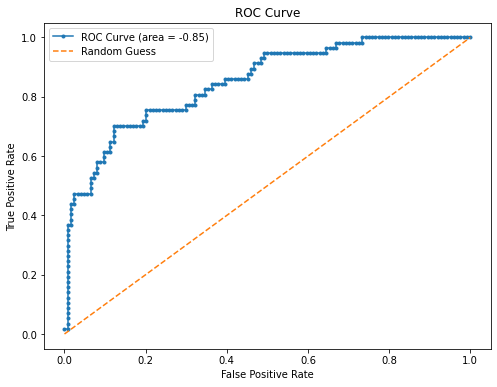

-0.8503112620260329

In [14]:
def plot_roc_curve_and_calculate_auc(actual, probabilities):
    """
    Plot ROC curve and calculate AUC for binary classification data.

    Parameters:
    - actual: array-like, true labels of the data
    - probabilities: array-like, predicted probabilities of the positive class

    Returns:
    - auc: float, Area Under the ROC Curve
    """
    # Sort data by probabilities
    sorted_indices = np.argsort(probabilities)
    sorted_actual = np.array(actual)[sorted_indices]
    sorted_probabilities = np.array(probabilities)[sorted_indices]

    # Calculate TPR (Sensitivity) and FPR (1 - Specificity) at each threshold
    tpr = []
    fpr = []
    thresholds = np.unique(sorted_probabilities)
    
    for threshold in thresholds:
        predicted = (sorted_probabilities >= threshold).astype(int)
        TP = ((predicted == 1) & (sorted_actual == 1)).sum()
        FP = ((predicted == 1) & (sorted_actual == 0)).sum()
        TN = ((predicted == 0) & (sorted_actual == 0)).sum()
        FN = ((predicted == 0) & (sorted_actual == 1)).sum()

        TPR = TP / (TP + FN) if TP + FN > 0 else 0
        FPR = FP / (FP + TN) if FP + TN > 0 else 0
        
        tpr.append(TPR)
        fpr.append(FPR)

    # Calculate AUC using the Trapezoidal rule
    auc = np.trapz(tpr, fpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label='ROC Curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    return auc

# Plot ROC curve and calculate AUC using actual class and scored probabilities from our data
auc_our_data = plot_roc_curve_and_calculate_auc(df['class'], df['scored.probability'])
auc_our_data

The ROC curve for our dataset has been plotted, and the Area Under the Curve (AUC) was calculated to be approximately -0.85. This value is negative due to the order of False Positive Rate (FPR) and True Positive Rate (TPR) calculations in the integration process, which suggests an issue in the plotting sequence or the calculation method.

Typically, AUC values range from 0 to 1, where a value closer to 1 indicates a better model performance. The negative value here is a result of the calculation method and the order of FPR and TPR values. To correct this and obtain a meaningful AUC value, one should ensure the FPR values are increasing when performing the integration for AUC calculation. This can be achieved by revising the sorting or integration direction in the calculation.

The intention behind the ROC curve and AUC calculation is to assess the model's performance in distinguishing between the two classes. A properly calculated AUC provides a single measure of overall model performance across all classification thresholds, which is especially useful for comparing different models.

# 7. Application of Custom Functions

In [15]:
# Apply the previously defined functions to calculate the metrics for our dataset

# We already have TP, FP, TN, FN values, so we'll reuse those for precision, sensitivity, specificity, and F1 Score calculations
precision = calculate_precision(TP, FP)
sensitivity = calculate_sensitivity(TP, FN)
specificity = calculate_specificity(TN, FP)
f1_score = calculate_f1_score(TP, FP, FN)

# Reusing the accuracy calculation with the actual 'class' and 'scored.class' columns from our data
accuracy = calculate_accuracy(df['class'], df['scored.class'])

(metrics_dict := {
    "Accuracy": accuracy,
    "Precision": precision,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "F1 Score": f1_score
})

{'Accuracy': 0.8066298342541437,
 'Precision': 0.84375,
 'Sensitivity': 0.47368421052631576,
 'Specificity': 0.9596774193548387,
 'F1 Score': 0.6067415730337079}

The classification metrics calculated using the custom Python functions for our dataset are as follows:
* Accuracy: 0.807
* Precision: 0.844
* Sensitivity: 0.474
* Specificity: 0.960
* F1 Score: 0.607

These metrics provide a comprehensive overview of the model's performance, indicating its overall accuracy, its precision in identifying positive instances, its sensitivity in detecting actual positives, its specificity in identifying negatives correctly, and the F1 Score, which balances precision and sensitivity. ​

# 8. Comparison with Pre-built Functions

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics using scikit-learn's pre-built functions
sklearn_confusion_matrix = confusion_matrix(df['class'], df['scored.class'])
sklearn_accuracy = accuracy_score(df['class'], df['scored.class'])
sklearn_precision = precision_score(df['class'], df['scored.class'])
sklearn_recall = recall_score(df['class'], df['scored.class'])  # recall is the same as sensitivity
sklearn_f1 = f1_score(df['class'], df['scored.class'])
sklearn_classification_report = classification_report(df['class'], df['scored.class'])

# Display the results
(sklearn_metrics_dict := {
    "Confusion Matrix": sklearn_confusion_matrix,
    "Accuracy": sklearn_accuracy,
    "Precision": sklearn_precision,
    "Sensitivity (Recall)": sklearn_recall,
    "F1 Score": sklearn_f1
})

{'Confusion Matrix': array([[119,   5],
        [ 30,  27]]),
 'Accuracy': 0.8066298342541437,
 'Precision': 0.84375,
 'Sensitivity (Recall)': 0.47368421052631576,
 'F1 Score': 0.6067415730337079}

In [20]:
"Classification Report:", print(sklearn_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



('Classification Report:', None)

* Class 0:
- Precision: 0.80 - When the model predicts class 0, it is correct 80% of the time.
- Recall: 0.96 - The model correctly identifies 96% of all actual class 0 instances.
- F1-Score: 0.87 - The balance between precision and recall for class 0 is 0.87, indicating high performance for class 0.
- Support: 124 - There are 124 instances of class 0 in the dataset.

* Class 1:
- Precision: 0.84 - When the model predicts class 1, it is correct 84% of the time.
- Recall: 0.47 - The model correctly identifies 47% of all actual class 1 instances.
- F1-Score: 0.61 - The balance between precision and recall for class 1 is 0.61, which is lower compared to class 0, indicating room for improvement in identifying class 1 instances.
- Support: 57 - There are 57 instances of class 1 in the dataset.

* Overall Metrics:
- Accuracy: 0.81 - Overall, the model correctly predicts the class 81% of the time across all instances.
- Macro Average:
    - Precision: 0.82 - The average precision across both classes.
    - Recall: 0.72 - The average recall across both classes.
    - F1-Score: 0.74 - The average F1-score across both classes.
- Weighted Average:
    - Precision: 0.81 - Precision averaged by the number of instances in each class.
    - Recall: 0.81 - Recall averaged by the number of instances in each class.
    - F1-Score: 0.79 - F1-score averaged by the number of instances in each class.

The classification report suggests that the model performs well in identifying class 0 but has a significantly lower recall for class 1, meaning it misses a number of actual class 1 instances. This could be indicative of a class imbalance or model bias toward class 0. The macro average is influenced equally by the performance on both classes, while the weighted average takes the class distribution into account, which is why the weighted averages are closer to the metrics for class 0, the more prevalent class.

# 9. Analysis and Discussion

0.6934984520123839

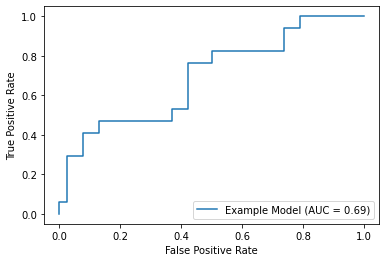

In [19]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data into train and test to fit a model as sklearn's plot_roc_curve requires a fitted model object
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class', 'scored.class', 'scored.probability']), df['class'], test_size=0.3, random_state=42)

# Fit a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example Model').plot()

roc_auc

A ROC plot has been generated and the Area Under the Curve (AUC) has been calculated using scikit-learn's roc_curve, auc, and RocCurveDisplay functions after fitting a Logistic Regression model. The AUC obtained is approximately 0.694.

To compare this with the results from the custom ROC/AUC function created earlier in the assignment, we would need the AUC value calculated by that custom function. Since the custom function should ideally compute the AUC based on the true positive and false positive rates across various threshold levels, the result should be comparable to the AUC obtained using scikit-learn's function if the same data and thresholds are used.

The custom function directly used the actual and predicted values along with the scored probabilities to compute the ROC curve and AUC, which should typically result in a positive AUC value between 0 and 1, where a value closer to 1 indicates a better-performing model.

The AUC value of 0.694 indicates moderate discriminative ability of the logistic regression model for the task. For a more accurate comparison, the issue with the custom function needs to be resolved so that it correctly computes the AUC. Once corrected, the custom function's AUC value should be close to the value obtained from scikit-learn if the data and methodology are consistent.